# Segmentation_EMStack_CurrentBestArchitecture#
### In this example, the best current architecture is being explored. Limitations for this task are the amount of time training takes, the more layers are added.
#### Network ####
See below
#### Note ####
Almost always converges to a nice solution.

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import numpy as np
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.6.9
['/home/adria/anaconda3/lib/python36.zip', '/home/adria/anaconda3/lib/python3.6', '/home/adria/anaconda3/lib/python3.6/lib-dynload', '', '/home/adria/.local/lib/python3.6/site-packages', '/home/adria/anaconda3/lib/python3.6/site-packages', '/home/adria/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/GITHUB/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb

In [3]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage import io
imTrain = io.imread(os.getcwd() + '/data/train-volume.tif')
NumImages = 30;
ImageDim = 512 * 512
imsTrain = np.reshape(imTrain, (NumImages, ImageDim)).transpose() 
imsTrain = imsTrain.astype(np.double)/255

imTest = io.imread(os.getcwd() + '/data/test-volume.tif')
imsTest = np.reshape(imTest, (NumImages, ImageDim)).transpose() 
imsTest = imsTest.astype(np.double)/255

lbTrain = io.imread(os.getcwd() + '/data/train-labels.tif')
lbsTrain = np.reshape(lbTrain, (NumImages, ImageDim)).transpose()
enc = OneHotEncoder(categories='auto')
enc.fit(lbsTrain.reshape(-1, 1))
lbsTrainOneHot = np.zeros((ImageDim,NumImages * 2))
for idx in range(0,NumImages):
    lbsTrainOneHot[:,2*idx:(2*idx +2)] = enc.transform(lbsTrain[:,idx].reshape(-1, 1)).toarray()
idx = 0
someIm0 = imsTrain[:,0];
someLb0 = lbsTrain[:,0];
someIm1 = imsTrain[:,1];
someLb1 = lbsTrain[:,1];

In [4]:
print("Values per Image:", imsTrain.shape[0])
print("Number of images for training:", imsTrain.shape[1])

print("Values per  Label Image:", lbsTrainOneHot.shape[0])
print("Number of images for Label training:", lbsTrainOneHot.shape[1])
plt.ion()
inputVar = 30 # change to visualize
while inputVar < 30:
    f = plt.figure(figsize=(20,5))
    f.suptitle('Original image and One Hot Labels', fontsize=16)
    plt.subplot(131)
    plt.imshow(np.reshape(imsTrain[:,inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(132)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(133)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar + 1],(512,512)), interpolation='nearest', cmap='gray')
    plt.show()
    inputVar = int(input("Next Index? (Press 30 or larger escape)."))# wait for input from the user

Values per Image: 262144
Number of images for training: 30
Values per  Label Image: 262144
Number of images for Label training: 60


In [5]:
labelDepth = 2
#segSimple = pyb.SegmentationExample1(512,512,1,convolutionDepth,labelDepth)
segSimple = pyb.AutoencoderExpSkip(512,512,1,labelDepth)

Conv In Depth: 1 In Height: 512 In Width: 512 Out Depth: 8 Out Height: 512 Out Width: 512
Conv In Depth: 8 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 512 Out Width: 512
Maxp In Depth: 16 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 256 Out Width: 256
Conv In Depth: 16 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 256 Out Width: 256
Conv In Depth: 32 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 256 Out Width: 256
Maxp In Depth: 32 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 128 Out Width: 128
Conv In Depth: 32 In Height: 128 In Width: 128 Out Depth: 64 Out Height: 128 Out Width: 128
Conv In Depth: 64 In Height: 128 In Width: 128 Out Depth: 64 Out Height: 128 Out Width: 128
Tran In Depth: 64 In Height: 128 In Width: 128 Out Depth: 32 Out Height: 256 Out Width: 256
Conv In Depth: 32 In Height: 256 In Width: 256 Out Depth: 16 Out Height: 256 Out Width: 256
Tran In Depth: 16 In Height: 256 In Width: 256 Out Depth: 8 Out Height: 512 Out Wid

In [6]:
segSimple.Train(imsTrain,lbsTrainOneHot,0.000005,20)
segSimpleOut = segSimple.Test(imsTrain[:,0])

trainingLoss[0]=47107.8
trainingLoss[1]=44973.5
trainingLoss[2]=44962.4
trainingLoss[3]=44951.8
trainingLoss[4]=44958.2
trainingLoss[5]=44962.6
trainingLoss[6]=44967.8
trainingLoss[7]=44970.4
trainingLoss[8]=44971.7
trainingLoss[9]=44946.8
trainingLoss[10]=44943.1
trainingLoss[11]=44968.7
trainingLoss[12]=44961.4
trainingLoss[13]=44953.1
trainingLoss[14]=44988.9
trainingLoss[15]=44958.1
trainingLoss[16]=44957.9
trainingLoss[17]=44936.5
trainingLoss[18]=44956.9
trainingLoss[19]=44955.3
testing:


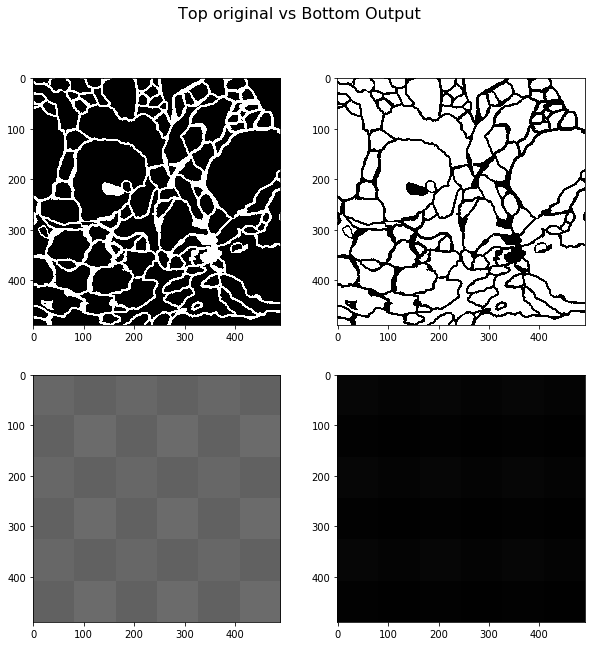

In [7]:
# Since the testing labels are not provided, here I check one of the training images.
f = plt.figure(figsize=(10,10))
f.suptitle('Top original vs Bottom Output', fontsize=16)
plt.subplot(221)
plt.imshow(np.reshape(lbsTrainOneHot[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(222)
plt.imshow(np.reshape(lbsTrainOneHot[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(223)
plt.imshow(np.reshape(segSimpleOut[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(224)
plt.imshow(np.reshape(segSimpleOut[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.show()

testing:


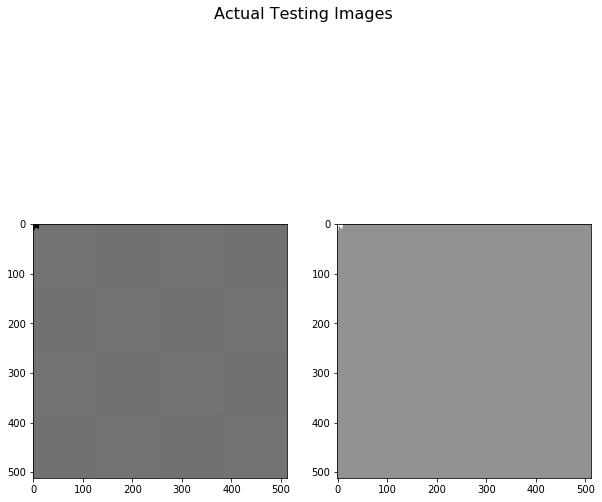

In [8]:
segSimpleOut = segSimple.Test(imsTest[:,0])
f = plt.figure(figsize=(10,10))
f.suptitle('Actual Testing Images', fontsize=16)
plt.subplot(121)
plt.imshow(np.reshape(segSimpleOut[:,0],(512,512)), interpolation='nearest', cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(segSimpleOut[:,1],(512,512)), interpolation='nearest', cmap='gray')
plt.show()

In [9]:
segSimpleOut.tolist()

[[0.18861349449068834, 0.7874474307347775],
 [0.16380139417209513, 0.9115538605417048],
 [0.002673421244081881, 0.9720854159816668],
 [0.00659757499246425, 0.46934476891930466],
 [0.003616572367285485, 0.9822563740328483],
 [2.276554507257695e-06, 0.9999799186885994],
 [0.00016613505798926937, 0.9999468764626805],
 [6.512491169130598e-06, 0.9997480858351512],
 [0.012813255359435408, 0.989780363492103],
 [1.957253645991914e-06, 0.9994885149867421],
 [0.0009448581900513339, 0.9979442553702235],
 [0.004068618869513803, 0.9982198190198827],
 [0.14078863841912517, 0.6967915229712944],
 [0.2269463110625913, 0.7729739333789162],
 [0.22734668299851057, 0.7732105212185563],
 [0.2269463110625913, 0.7729739333789162],
 [0.22734668299851057, 0.7732105212185563],
 [0.2269463110625913, 0.7729739333789162],
 [0.22734668299851057, 0.7732105212185563],
 [0.2269463110625913, 0.7729739333789162],
 [0.22734668299851057, 0.7732105212185563],
 [0.2269463110625913, 0.7729739333789162],
 [0.22734668299851057,